In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

%matplotlib inline 
sns.set_style("white")

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("../data/merged_dataframe.csv")

In [3]:
df.head()

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Population Density,Current Covid Cases,Happiness Score
0,Denmark,192.67,100.88,74.90,80.00,28.85,21.33,81.80,58.57,123.0,85.3,87.0,135,27072.0,7.6456
1,Switzerland,192.01,119.53,78.40,72.44,29.09,22.39,79.24,87.89,125.0,76.6,85.0,208,52646.0,7.5599
2,Finland,190.22,99.93,76.68,75.79,29.90,11.55,58.87,49.18,124.0,80.2,86.0,16,9743.0,7.8087
3,Australia,186.21,107.31,58.64,77.38,34.73,23.46,92.70,55.04,125.0,81.2,77.0,3,27055.0,7.2228
4,Netherlands,183.67,90.73,72.38,74.65,29.43,27.41,87.61,55.30,123.0,76.1,82.0,420,114540.0,7.4489


In [4]:
df.dtypes

Country                            object
Quality of Life Index             float64
Purchasing Power Index            float64
Safety Index                      float64
Health Care Index                 float64
Traffic Commute Time Index        float64
Pollution Index                   float64
Climate Index                     float64
Cost of Living Plus Rent Index    float64
Passport Index                    float64
Ease of Doing Business Index      float64
Corruption Index                  float64
Population Density                 object
Current Covid Cases               float64
Happiness Score                   float64
dtype: object

In [6]:
# convert Population density from str to float
df['Population Density'] = df['Population Density'].str.replace(',', '').astype(float)

In [7]:
df.dtypes

Country                            object
Quality of Life Index             float64
Purchasing Power Index            float64
Safety Index                      float64
Health Care Index                 float64
Traffic Commute Time Index        float64
Pollution Index                   float64
Climate Index                     float64
Cost of Living Plus Rent Index    float64
Passport Index                    float64
Ease of Doing Business Index      float64
Corruption Index                  float64
Population Density                float64
Current Covid Cases               float64
Happiness Score                   float64
dtype: object

In [10]:
# check NaN
df.isna().sum()

Country                           0
Quality of Life Index             0
Purchasing Power Index            0
Safety Index                      0
Health Care Index                 0
Traffic Commute Time Index        0
Pollution Index                   0
Climate Index                     0
Cost of Living Plus Rent Index    0
Passport Index                    4
Ease of Doing Business Index      8
Corruption Index                  3
Population Density                2
Current Covid Cases               6
Happiness Score                   6
dtype: int64

In [14]:
# drop NaN
df = df.dropna()
df.isna().sum()

Country                           0
Quality of Life Index             0
Purchasing Power Index            0
Safety Index                      0
Health Care Index                 0
Traffic Commute Time Index        0
Pollution Index                   0
Climate Index                     0
Cost of Living Plus Rent Index    0
Passport Index                    0
Ease of Doing Business Index      0
Corruption Index                  0
Population Density                0
Current Covid Cases               0
Happiness Score                   0
dtype: int64

In [16]:
df.shape

(63, 15)

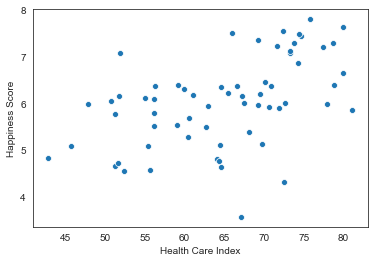

In [17]:
sns.scatterplot(data=df,
                x="Health Care Index", 
                y="Happiness Score");

In [18]:
X_1 = df[["Health Care Index", "Happiness Score"]]
clusters = KMeans(n_clusters=3)
clusters.fit(X_1)

KMeans(n_clusters=3)

In [19]:
clusters.predict(X_1)

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1,
       2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0],
      dtype=int32)

In [20]:
X_1.assign(cluster=clusters.predict(X_1))

,Health Care Index,Happiness Score,cluster
0,80.00,7.6456,1
1,72.44,7.5599,1
2,75.79,7.8087,1
3,77.38,7.2228,1
4,74.65,7.4489,1
...,...,...,...
74,67.47,6.0060,2
75,72.53,4.3270,1
77,55.59,4.5830,0
78,42.80,4.8328,0


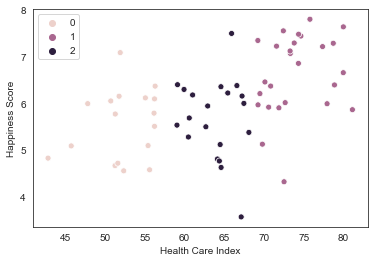

In [21]:
sns.scatterplot(data=X_1,
                x="Health Care Index",
                y="Happiness Score", 
                hue=clusters.predict(X_1));

In [22]:
a,b = X_1.columns

In [23]:
a

'Health Care Index'

In [24]:
b

'Happiness Score'

In [25]:
def cluster_1(X_1, n=3):
    cluster= KMeans(n_clusters=n, n_init=1)
    cluster.fit(X_1)
    
    x,y = X_1.columns
    sns.scatterplot(data=X_1,
                x=x,
                y=y, 
                hue=cluster.predict(X_1),
                palette="colorblind");
    print(f"Inertia: {cluster.inertia_}")

Inertia: 797.9264932054912


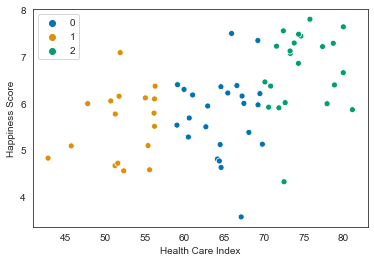

In [26]:
cluster_1(X_1)

Inertia: 364.0336658684701


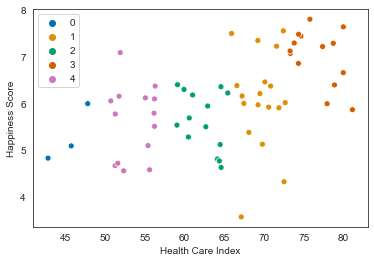

In [28]:
X_1_1 = df[["Health Care Index", "Happiness Score"]]
cluster_1(X_1_1, n=5)

In [30]:
# determine the optimal number of clusters
X_1.head()

,Health Care Index,Happiness Score
0,80.00,7.6456
1,72.44,7.5599
2,75.79,7.8087
3,77.38,7.2228
4,74.65,7.4489


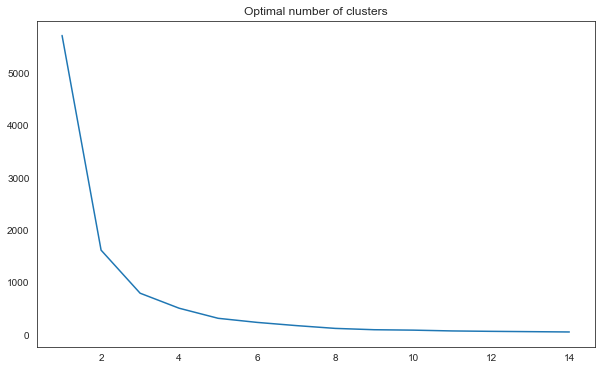

In [31]:
inertias = {}

for k in range(1,15):
    cl = KMeans(n_clusters=k).fit(X_1)
    inertias[k] = cl.inertia_
plt.figure(figsize=(10,6))
sns.lineplot(x=list(inertias.keys()),
             y=list(inertias.values()));
plt.title("Optimal number of clusters");

In [33]:
#wrap into a fuction
def plot_elbow(X):
    inertias = {}   
    for k in range(1,15):
        cl = KMeans(n_clusters=k).fit(X)
        inertias[k] = cl.inertia_
    plt.figure(figsize=(10,6))
    sns.lineplot(x=list(inertias.keys()),
                 y=list(inertias.values()));
    plt.title("Optimal number of clusters");

In [32]:
X_2 = df[['Purchasing Power Index','Safety Index', 'Health Care Index',
                             'Traffic Commute Time Index','Pollution Index','Climate Index',
                             'Cost of Living Plus Rent Index','Passport Index','Ease of Doing Business Index',
                             'Corruption Index','Population Density','Current Covid Cases', 'Happiness Score']]

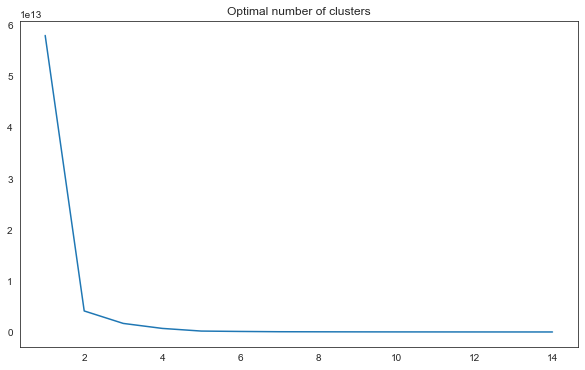

In [34]:
plot_elbow(X_2)

In [35]:
clusters2 = KMeans(n_clusters=2).fit(X_2)

In [40]:
import plotly.graph_objs as go
scatter = go.Scatter3d(y=df["Happiness Score"],
                       x=df["Health Care Index"], 
                       z=df["Cost of Living Plus Rent Index"],
                       mode="markers",
                       marker=dict(color=clusters2.predict(X_2)));
layout = go.Layout(title="Happiness clustering", 
                   scene=dict(xaxis=dict(title="Healthcare"),
                              yaxis=dict(title="Happiness"),
                              zaxis=dict(title="Cost of Living")));
fig = go.Figure(data=scatter, layout=layout);
plotly.offline.iplot(fig)

In [37]:
X_3 = df[['Purchasing Power Index','Safety Index', 'Health Care Index', 'Traffic Commute Time Index','Pollution Index',
                             'Cost of Living Plus Rent Index','Passport Index','Ease of Doing Business Index',
                             'Corruption Index', 'Happiness Score']]

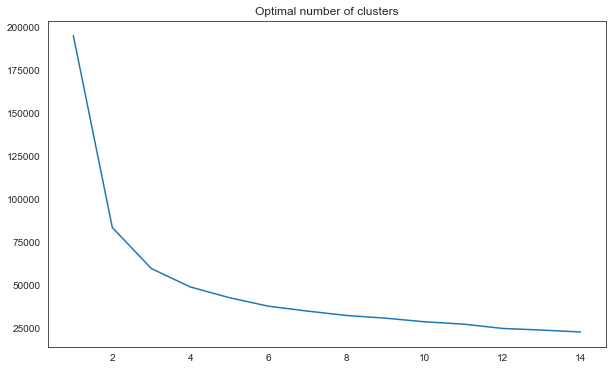

In [38]:
plot_elbow(X_3)

In [44]:
cluster_1(X_3, n=2)

ValueError: too many values to unpack (expected 2)

In [46]:
sns.scatterplot(data=df,
                x='Purchasing Power Index','Safety Index', 'Health Care Index', 'Traffic Commute Time Index','Pollution Index',
                             'Cost of Living Plus Rent Index','Passport Index','Ease of Doing Business Index',
                             'Corruption Index'
                y="Happiness Score"
                hue=clusters.predict(df));

SyntaxError: invalid syntax (<ipython-input-46-b1b3cdccb7e4>, line 5)